In [1]:
!pip install opencv-python
!pip install dlib
!pip install face_recognition
!pip install Augmentor
!pip install scikeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=8354fcc506fab5f018d3f1f1c8d9ae4cc1552162a7dfe25b1efce56ec84e451c
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
import cv2
import face_recognition
import matplotlib.pyplot as plt

In [3]:
def extract_face_features(image_path):
    # Đọc ảnh đầu vào
    image = cv2.imread(image_path)

    # Chuyển đổi ảnh sang không gian màu RGB (dlib sử dụng không gian màu này)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Tìm kiếm khuôn mặt trong ảnh
    face_locations = face_recognition.face_locations(rgb_image)

    if len(face_locations) == 0:
        print("Không tìm thấy khuôn mặt trong ảnh.")
        return None

    # Lấy vị trí của khuôn mặt đầu tiên
    top, right, bottom, left = face_locations[0]

    # Cắt ảnh để chỉ giữ lại khuôn mặt
    face_image = image[top:bottom, left:right]

    # Hiển thị khuôn mặt đã cắt (tùy chọn)
    plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Trích xuất vector đặc trưng của khuôn mặt
    face_encoding = face_recognition.face_encodings(rgb_image, face_locations)[0]

    return face_encoding

In [4]:
import cv2
import face_recognition
import numpy as np
import requests
from io import BytesIO
from sklearn.ensemble import RandomForestClassifier

# Hàm trích xuất đặc trưng từ ảnh khuôn mặt
def extract_face_features_by_url(image_path):
    response = requests.get(image_path)
    img = np.asarray(bytearray(response.content), dtype="uint8")
    image = cv2.imdecode(img, cv2.IMREAD_COLOR)

    # Chuyển đổi ảnh sang không gian màu RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Tìm kiếm khuôn mặt trong ảnh
    face_locations = face_recognition.face_locations(rgb_image)

    if len(face_locations) == 0:
        print("Không tìm thấy khuôn mặt trong ảnh.")
        return None

    # Lấy vị trí của khuôn mặt đầu tiên
    top, right, bottom, left = face_locations[0]

    # Cắt ảnh để chỉ giữ lại khuôn mặt
    face_image = image[top:bottom, left:right]

    # Hiển thị khuôn mặt đã cắt (tùy chọn)
    plt.imshow(cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Trích xuất vector đặc trưng của khuôn mặt
    face_encoding = face_recognition.face_encodings(rgb_image, face_locations)[0]

    return face_encoding

In [5]:
!pip install unrar
!unrar x /content/img.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/img.rar

Creating    img                                                       OK
Creating    img/train                                                 OK
Creating    img/train/ben_afflek                                      OK
Extracting  img/train/ben_afflek/httpcsvkmeuaeccjpg.jpg                    0%  OK 
Extracting  img/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg       1%  OK 
Extracting  img/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg       3%  OK 
Extracting  img/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg       4%  OK 
Extracting  img/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg       6%  OK 
Extracting  img/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg   

In [6]:
# Đường dẫn đến thư mục chứa ảnh
base_folder = '/content/img'

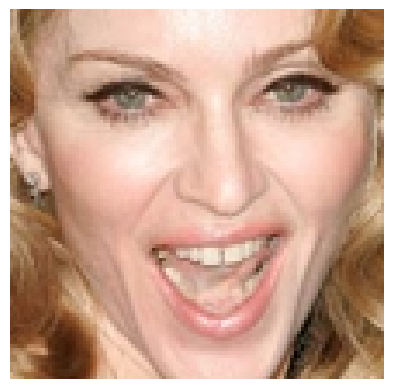

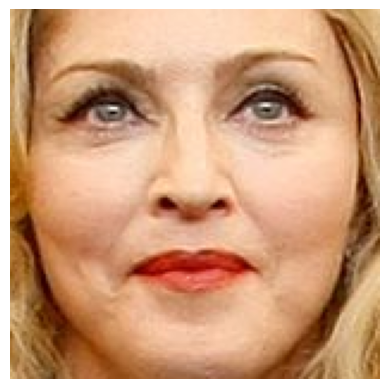

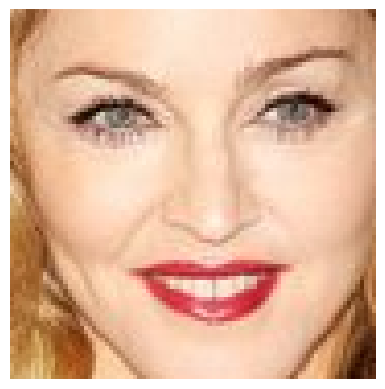

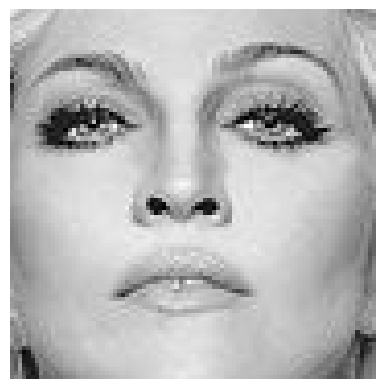

Không tìm thấy khuôn mặt trong ảnh.


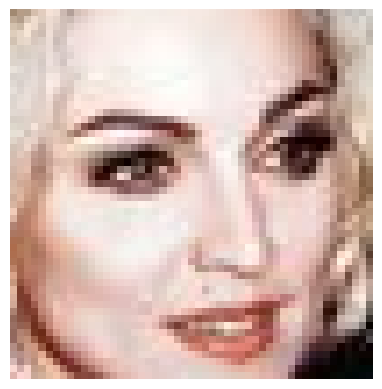

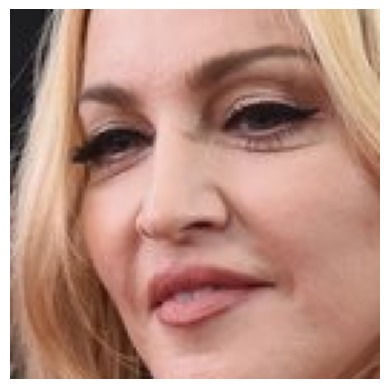

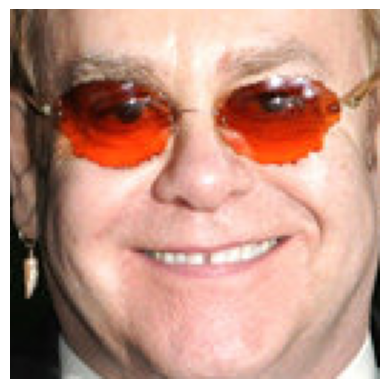

Không tìm thấy khuôn mặt trong ảnh.


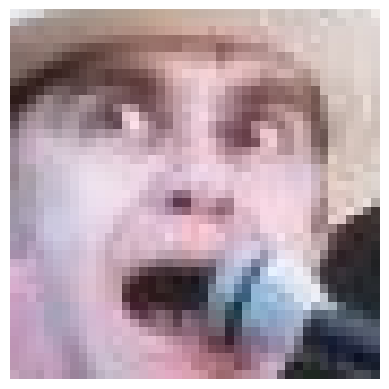

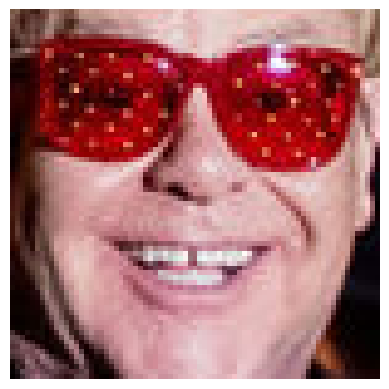

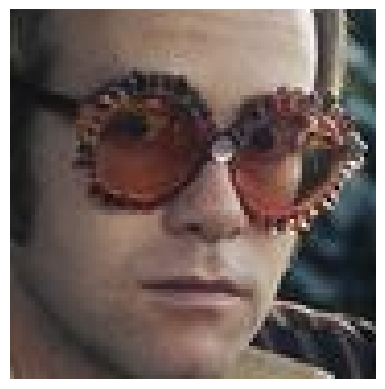

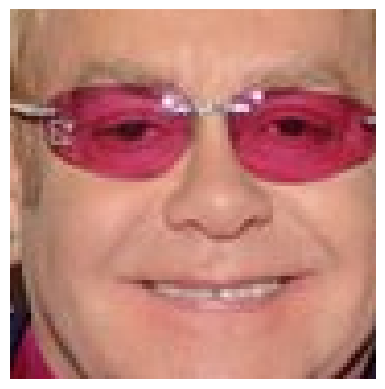

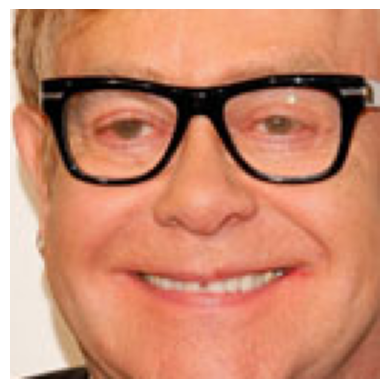

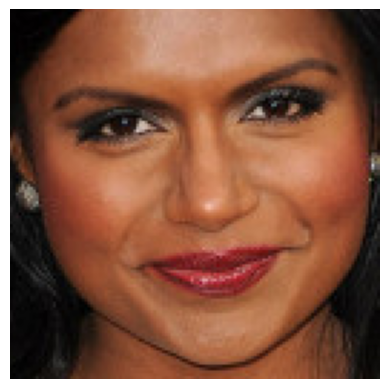

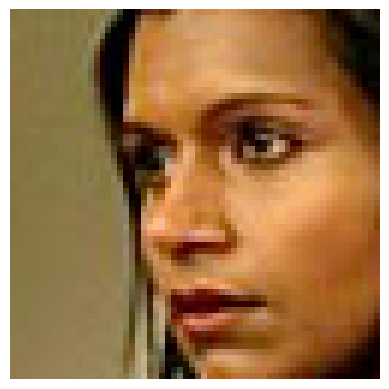

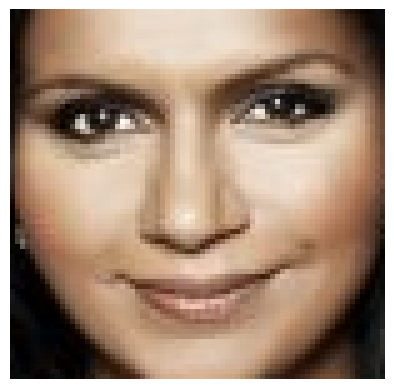

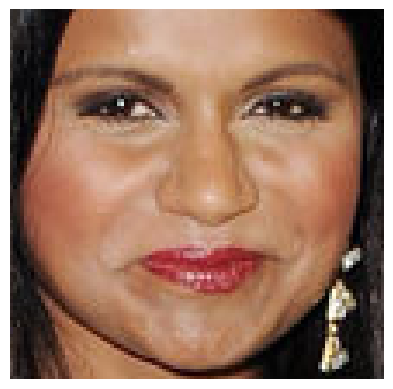

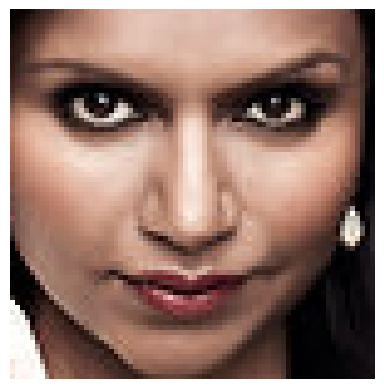

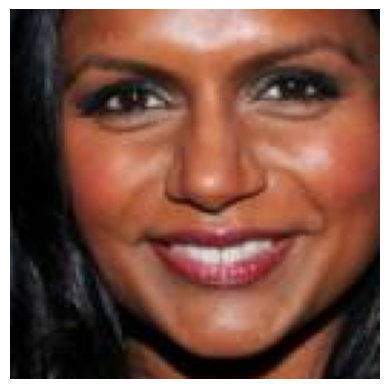

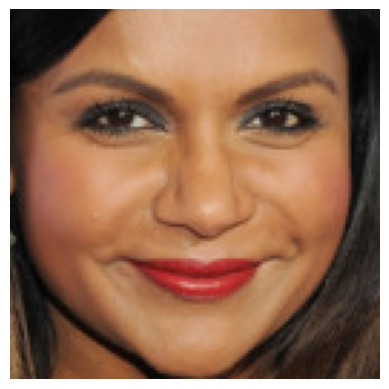

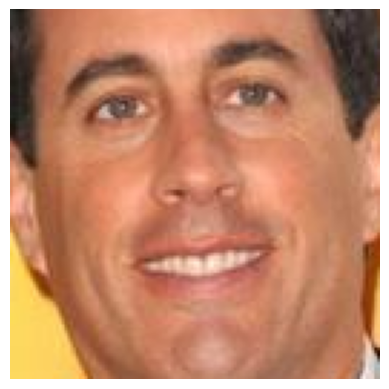

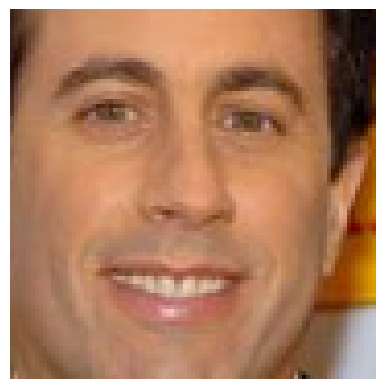

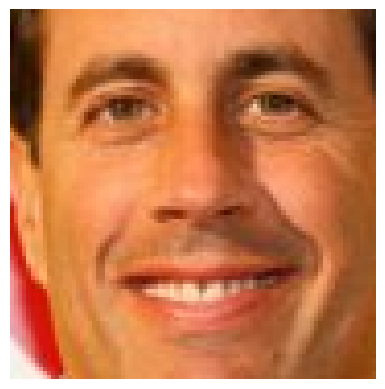

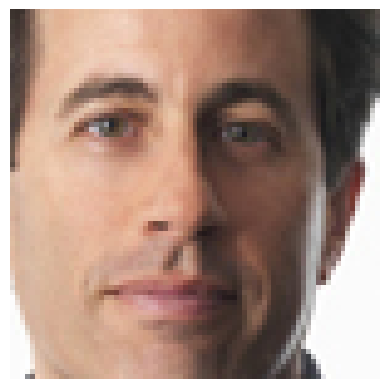

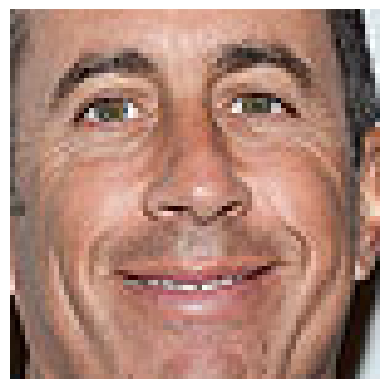

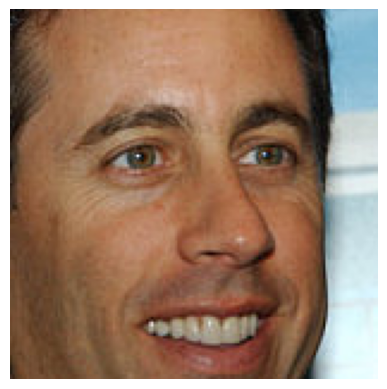

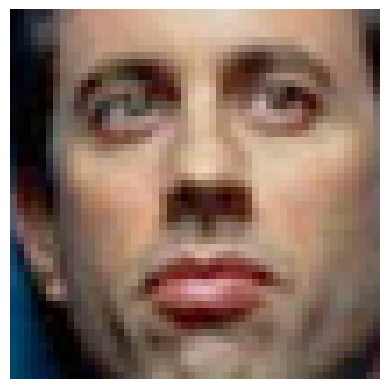

Không tìm thấy khuôn mặt trong ảnh.


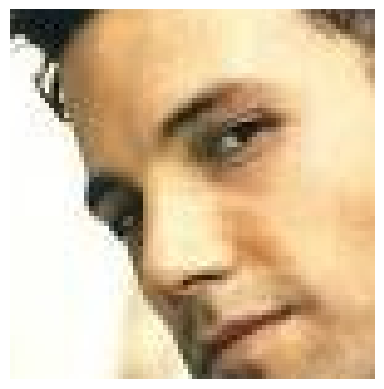

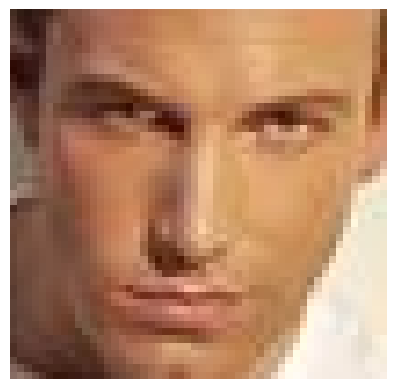

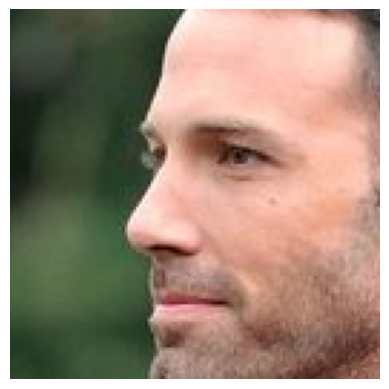

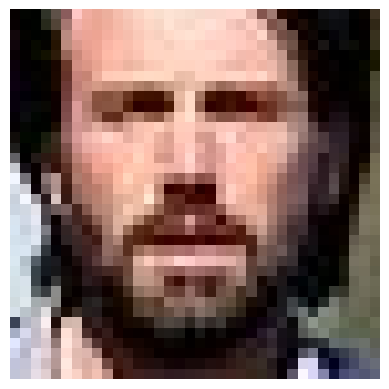

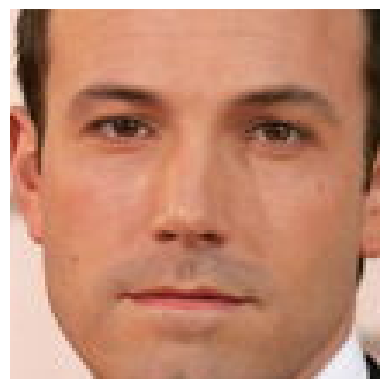

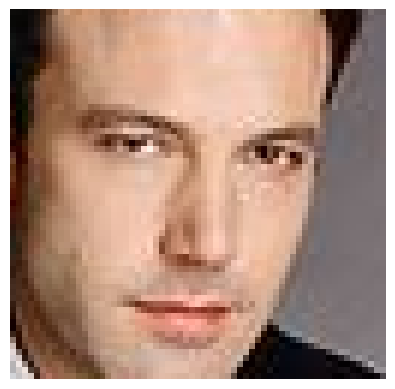

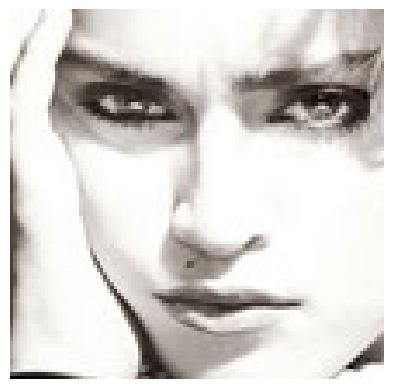

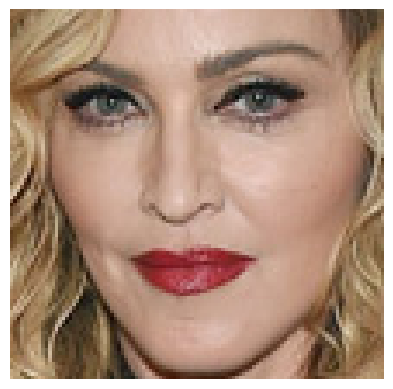

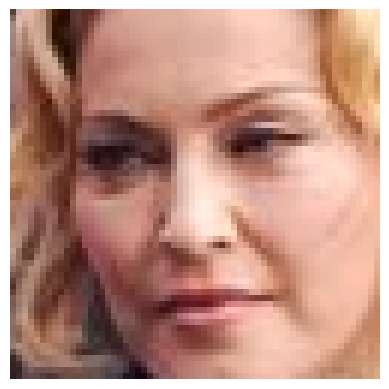

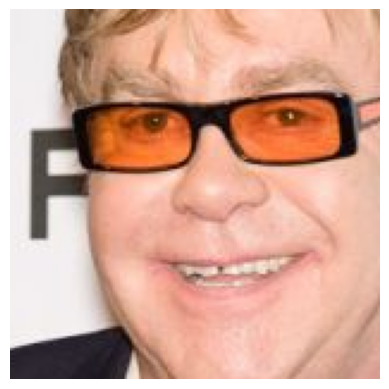

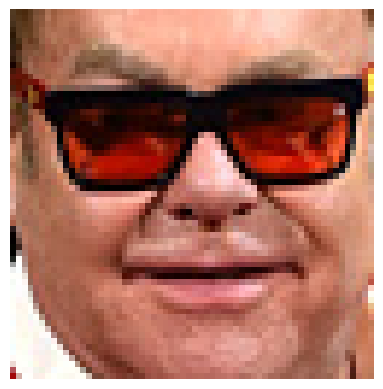

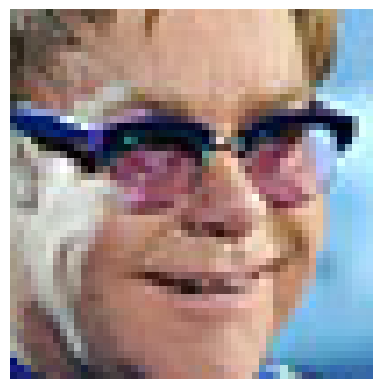

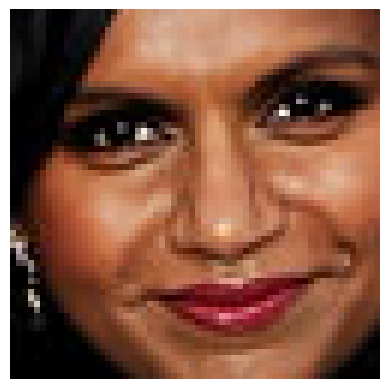

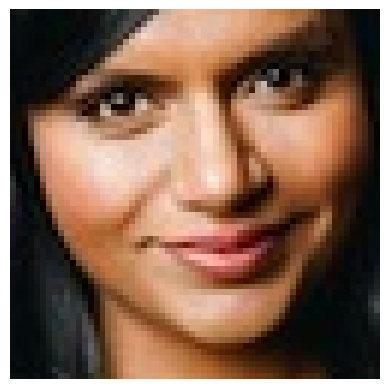

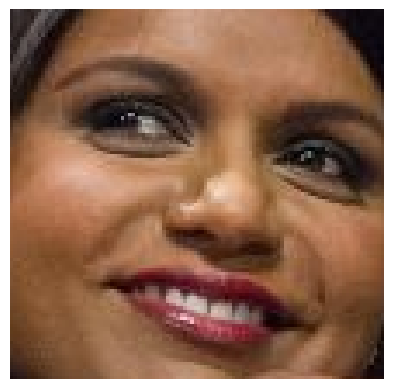

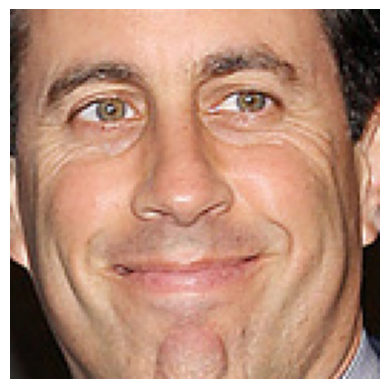

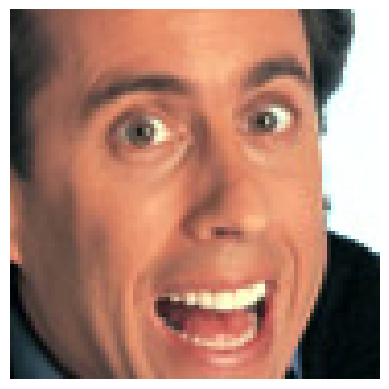

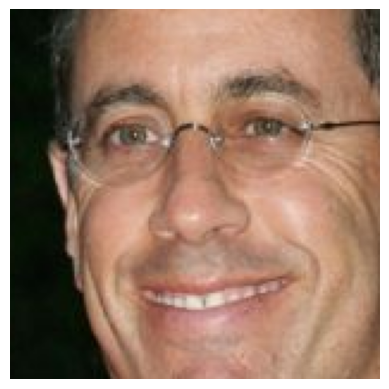

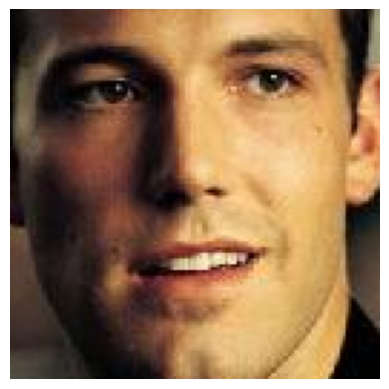

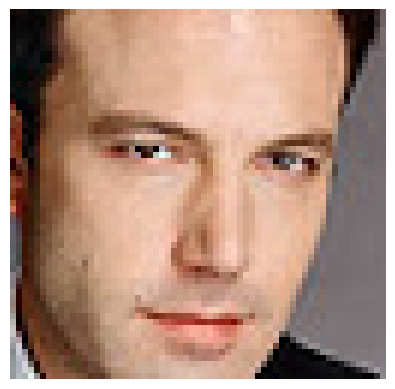

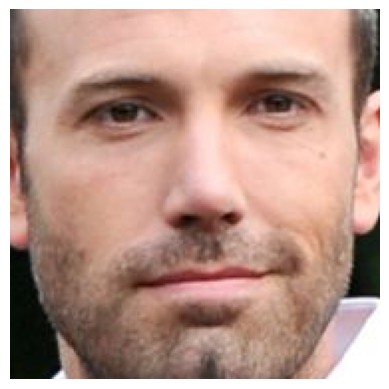

Quá trình tạo CSV hoàn thành.


In [7]:
import os
import cv2
import face_recognition
import csv


# Duyệt qua train và val
for dataset_type in ['train', 'val']:
    # Đường dẫn đến thư mục train hoặc val
    dataset_folder = os.path.join(base_folder, dataset_type)

    # Tạo file CSV cho train hoặc val
    csv_filename = f'{dataset_type}.csv'
    csv_filepath = os.path.join(base_folder, csv_filename)

    # Mở file CSV để ghi
    with open(csv_filepath, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)

        # Duyệt qua tất cả các thư mục con trong thư mục train hoặc val
        for person_folder in os.listdir(dataset_folder):
            person_path = os.path.join(dataset_folder, person_folder)

            # Duyệt qua tất cả các ảnh trong thư mục của mỗi người
            for image_filename in os.listdir(person_path):
                image_path = os.path.join(person_path, image_filename)

                # Trích xuất vector đặc trưng của khuôn mặt từ ảnh
                face_encoding = extract_face_features(image_path)

                if face_encoding is not None:
                    # Lấy nhãn từ tên thư mục của người đó
                    label = person_folder

                    # Ghi vector đặc trưng và nhãn vào file CSV
                    csv_writer.writerow(list(face_encoding) + [label])

print("Quá trình tạo CSV hoàn thành.")

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

feature_columns = [f'feature_{i}' for i in range(1, 129)]  # Tạo danh sách tên cho 128 chiều đặc trưng
columns = feature_columns + ['label']

# Đọc dữ liệu từ file CSV và đặt tên cho các cột
train_data = pd.read_csv('/content/img/train.csv', names=columns)
val_data = pd.read_csv('/content/img/val.csv', names=columns)


# Tách dữ liệu thành đặc trưng (X) và nhãn (y)
X_train = train_data.iloc[:, :-1]  # Tất cả cột trừ cột cuối cùng
y_train = train_data.iloc[:, -1]   # Chỉ cột cuối cùng

X_val = val_data.iloc[:, :-1]      # Tất cả cột trừ cột cuối cùng
y_val = val_data.iloc[:, -1]       # Chỉ cột cuối cùng

In [ ]:
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.utils import check_random_state
# import Augmentor

# # Tăng cường dữ liệu (Data Augmentation)
# def augment_data(X, y, num_samples=1000):
#     # Check the number of positive samples
#     num_positive_samples = np.sum(y == 1)

#     if num_positive_samples == 0:
#         print("Error: No positive samples for resampling.")
#         return X, y

#     # Resample the positive class
#     random_state = check_random_state(42)  # Adjust the seed if needed
#     indices = random_state.randint(0, num_positive_samples, size=(num_samples,))

#     # Tăng cường dữ liệu tương ứng với số lượng mẫu resampled
#     X_resampled, y_resampled = X[y == 1][indices], y[y == 1][indices]

#     # Tạo pipeline Augmentor để tăng cường dữ liệu
#     pipeline = Augmentor.Pipeline()
#     pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     pipeline.zoom_random(probability=0.5, percentage_area=0.8)
#     pipeline.flip_left_right(probability=0.5)

#     # Thực hiện tăng cường dữ liệu trên lớp thiểu số
#     for i in range(len(X_resampled)):
#         image = X_resampled[i].reshape((height, width, channels))  # Thay đổi kích thước dựa vào định dạng dữ liệu của bạn
#         augmented_image = pipeline._execute(image)
#         X = np.vstack([X, augmented_image.flatten()])
#         y = np.hstack([y, y_resampled[i]])

#     return X, y

In [ ]:
from sklearn.model_selection import GridSearchCV

# Tinh chỉnh tham số cho Random Forest
param_rf = {
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200,250]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=8), param_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

# Tinh chỉnh tham số cho Gradient Boosting
param_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=8), param_gb, cv=3, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
best_gb_model = grid_search_gb.best_estimator_


In [ ]:
# Hiển thị các tham số tối ưu cho Random Forest
print("Best Parameters for Random Forest:")
print(grid_search_rf.best_params_)

# Hiển thị các tham số tối ưu cho Gradient Boosting
print("\nBest Parameters for Gradient Boosting:")
print(grid_search_gb.best_params_)

Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Parameters for Gradient Boosting:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


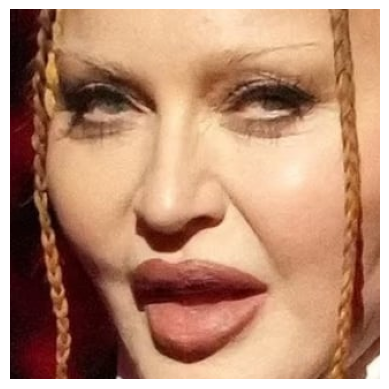

Nhãn dự đoán: madonna với tự tin 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [10]:
# # Đường dẫn của ảnh muốn nhận diện
# image_path_to_recognize = '/content/35af6a41332353.57a1ce913e889.jpg'

# # Trích xuất đặc trưng từ ảnh
# face_features = extract_face_features(image_path_to_recognize)

# Đường link của ảnh muốn nhận diện
image_url_to_recognize = 'https://cdn-i.vtcnews.vn/resize-v1/RgLM9ZZsOWs926odILYuDYVdajqpiyY2aRULFgZ5Rng/upload/2023/02/07/madona-08542945.jpg'

# Trích xuất đặc trưng từ ảnh
face_features = extract_face_features_by_url(image_url_to_recognize)

if face_features is not None:
    # Dự đoán xác suất cho từng nhãn
    predicted_proba = best_random_forest_model.predict_proba([face_features])[0]

    # Đặt ngưỡng tự tin
    confidence_threshold = 0.45

    # Xác định nhãn dự đoán và tự tin tương ứng
    predicted_label = best_random_forest_model.classes_[np.argmax(predicted_proba)]
    confidence = predicted_proba[np.argmax(predicted_proba)]
    # Kiểm tra xem tự tin có lớn hơn ngưỡng không
    if confidence > confidence_threshold:
        print(f'Nhãn dự đoán: {predicted_label} với tự tin {confidence:.2f}')
    else:
        print(f'Mô hình không tự tin với dự đoán của mình với tự tin {confidence:.2f}')
else:
    print("Không thể nhận diện khuôn mặt từ ảnh.")